# Introduction

In this project, I want to analyze data on calls to 911, try to find patterns and answer the main hypothesis:

Is it true that people are crazier on a full moon (they call 911 more often)?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Let's immediately see what data we are dealing with, whether it is necessary to process the missing results or change the data type in the columns

In [9]:
df = pd.read_csv('../input/montcoalert/911.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [10]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1


In [11]:
df = df.astype({"zip": "Int64"})

### Main questions:

#### What indexes are used to call 911 most often this Pennsylvania region?

In [12]:
df['zip'].value_counts().head()

19401    45606
19464    43910
19403    34888
19446    32270
19406    22464
Name: zip, dtype: Int64

#### From what localities 911 is called most often?

In [13]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

Let's create a new column with the reason for calling the rescue service and find the most common reason for calling

In [14]:
df['reason'] = df['title'].apply(lambda s:s.split(':')[0])
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [15]:
df['reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

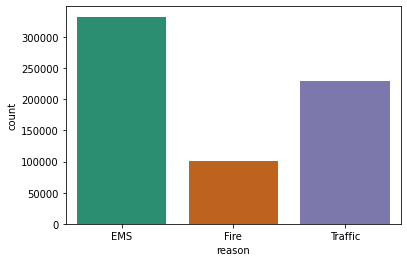

In [16]:
sns.countplot(x='reason', data=df,palette="Dark2")

In [17]:
df['dt'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [18]:
df['dt']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: dt, Length: 663522, dtype: datetime64[ns]

Since the data for 2020 is only for the first half of it, we will delete them so that they do not interfere with the analysis.

In [19]:
df = df[df['dt'] <= datetime.datetime(2019, 12, 10,0,0,0)]

**Let's add some new columns for further analysis**

In [20]:
df['hour'] = df['dt'].apply(lambda x: x.hour)
df['month'] = df['dt'].apply(lambda x: x.month)
df['weekday'] = df['dt'].apply(lambda x: x.dayofweek)

In [21]:
df['weekday'].unique()

array([3, 4, 5, 6, 0, 1, 2])

Note that the weekdays are written from 0 to 6, where **0 is Monday, and 6 is Sunday**

Use .map () with this dictionary to map the actual string names to the day of the week:

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['weekday'] = df['weekday'].apply(lambda int:dmap[int])

We stand a count plot of distribution by days of the week and reasons for the call

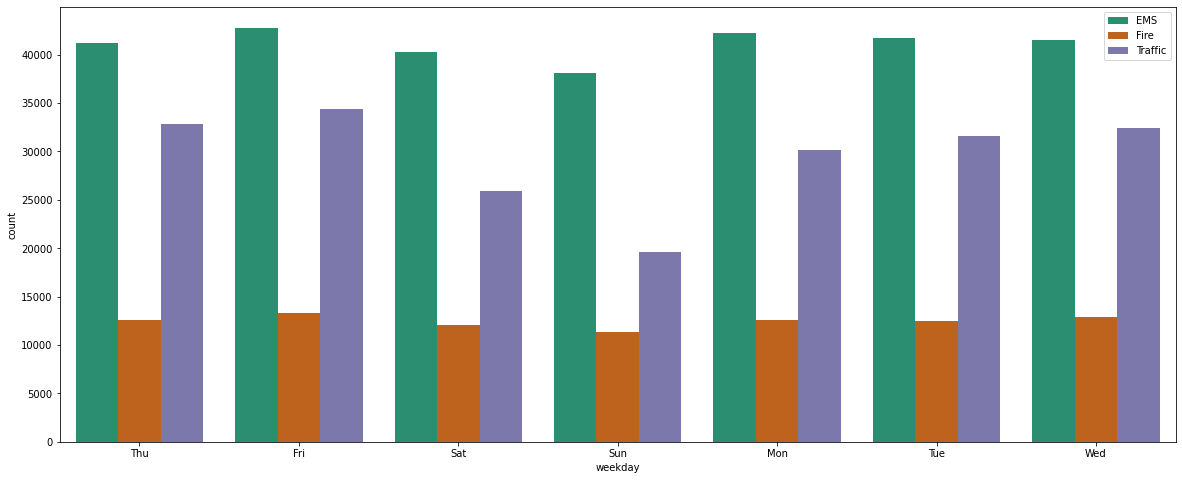

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x='weekday', hue='reason', data=df,palette="Dark2")
plt.legend(bbox_to_anchor=(1,1))

The fact that on Saturday and Sunday fewer accidents occur is easily explained by the fact that on weekends people often sit at home or leave somewhere, rather than driving around the city.

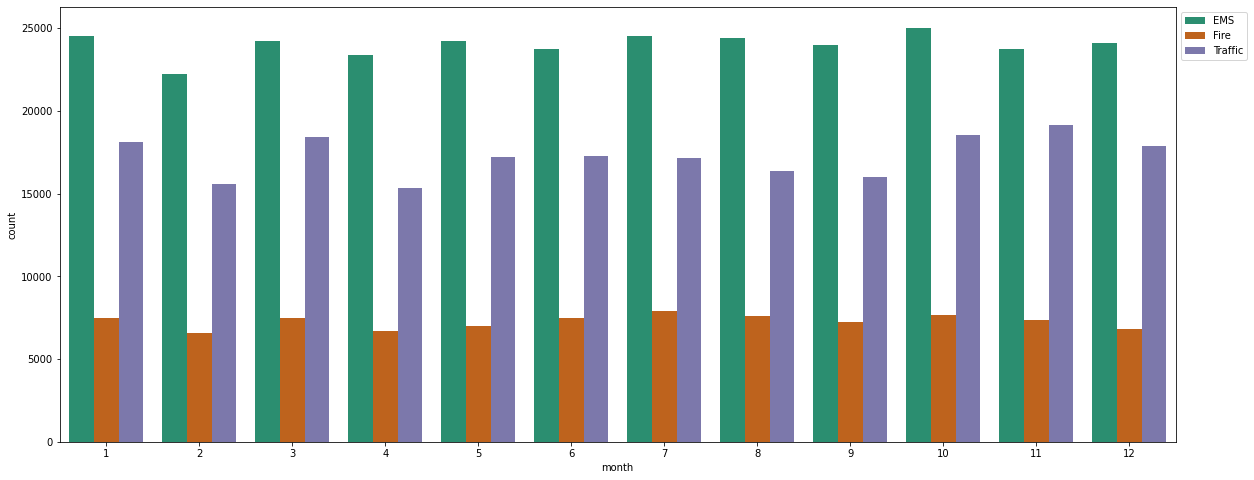

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(x='month', hue='reason', data=df,palette="Dark2")
plt.legend(bbox_to_anchor=(1,1))

In general, EMS and Firefighters are called equally frequently throughout the year. But accidents happen more often in winter due to bad weather.

<AxesSubplot:xlabel='month', ylabel='count'>

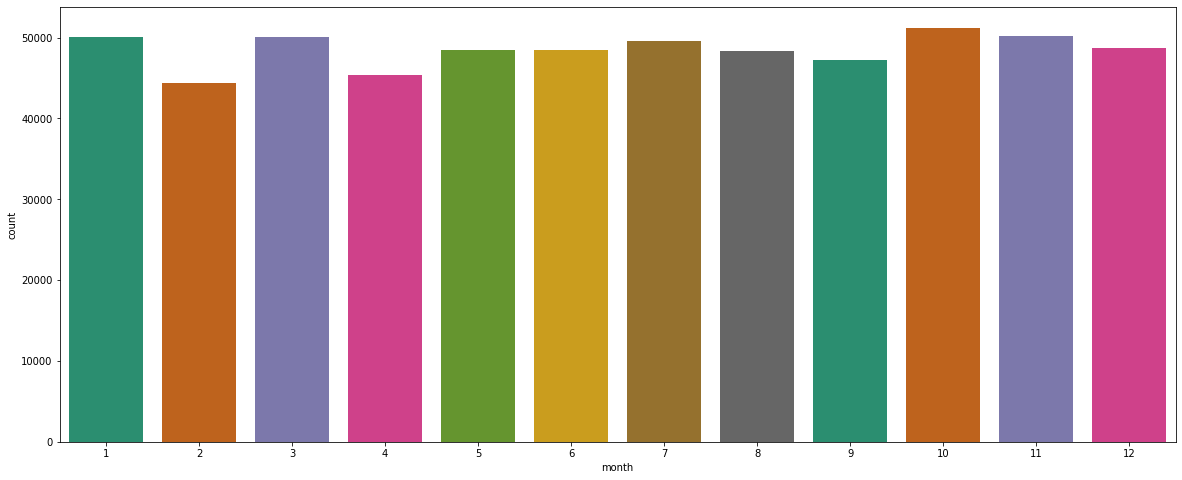

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x='month', data=df,palette="Dark2")

After the New Year and Christmas, people calm down and the number of calls decreases by ~ 10%.

Let's look at a heatmap using seaborn and our data. First, we will need to restructure the DataFrae so that the columns become Hours and the Index becomes the Day of the week.

In [27]:
dw_h_agg = df.pivot_table(index='weekday', columns='hour', values='e', aggfunc='count')
dw_h_agg = dw_h_agg.loc[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']]
dw_h_agg

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,1648,1372,1193,1116,1173,1597,2393,3956,4983,5109,...,4947,5422,5602,5666,4802,3918,3303,2861,2322,1805
Tue,1492,1249,1153,1063,1081,1517,2450,3935,5002,4960,...,5202,5547,5748,6110,4968,4023,3376,2946,2335,1828
Wed,1434,1279,1095,1106,960,1401,2371,4227,4904,4832,...,5291,5722,6009,6265,4986,4091,3613,3066,2456,1923
Thu,1497,1219,1233,1052,1083,1543,2514,3994,4718,4782,...,5282,5677,5588,6156,4888,4105,3586,3080,2482,2059
Fri,1743,1429,1281,1163,1135,1437,2346,3695,4407,4615,...,5592,6177,6261,6286,5002,4444,3837,3416,2995,2504
Sat,2122,1806,1658,1378,1255,1370,1669,2232,3028,3807,...,4770,4521,4535,4537,4369,4199,3668,3395,2855,2617
Sun,2135,1869,1698,1422,1313,1277,1517,2080,2619,3297,...,4138,3920,3971,3950,3833,3664,3286,2777,2275,2050


<AxesSubplot:xlabel='hour', ylabel='weekday'>

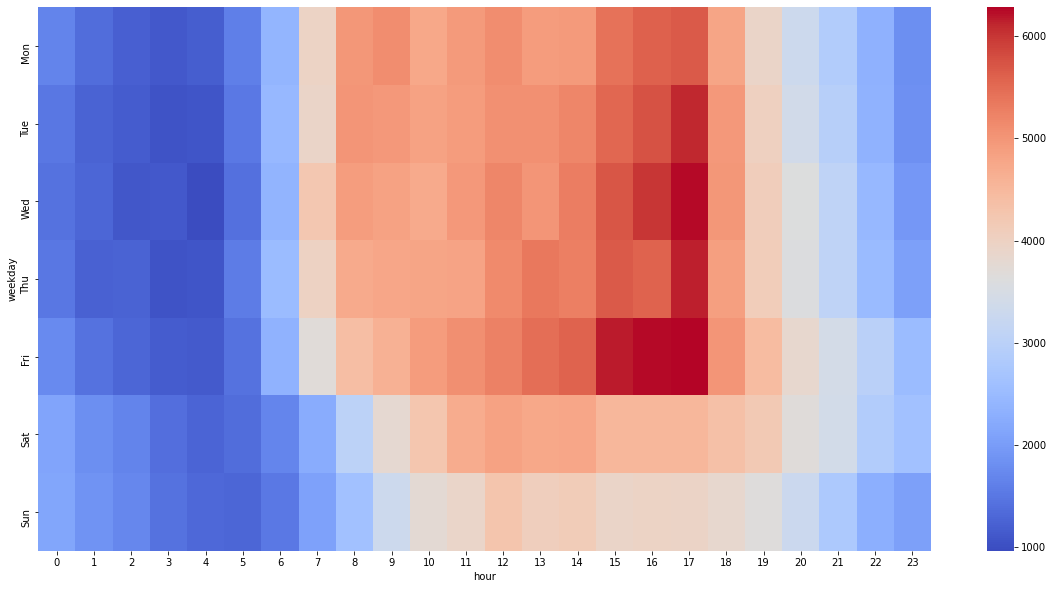

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(dw_h_agg,cmap= 'coolwarm')

It is easy to see that the peak of calls falls on a time in the middle of the day on weekdays.

In [29]:
df['dt'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x).date())

In [30]:
df = df[df['dt'] <= datetime.date(2016, 12, 10)]

In [31]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dt,hour,month,weekday
141990,40.048975,-75.301079,MT PLEASANT RD & LAFAYETTE RD; LOWER MERION; 2...,19010,Traffic: VEHICLE ACCIDENT -,2016-12-10 23:41:05,LOWER MERION,MT PLEASANT RD & LAFAYETTE RD,1,Traffic,2016-12-10,23,12,Sat
141991,40.189531,-75.103344,N YORK RD & E COUNTY LINE RD; HATBORO; 2016-12...,19040,Traffic: VEHICLE ACCIDENT -,2016-12-10 23:41:06,HATBORO,N YORK RD & E COUNTY LINE RD,1,Traffic,2016-12-10,23,12,Sat
141992,40.410363,-75.507643,6TH ST & JEFFERSON ST; EAST GREENVILLE; Stati...,18041,EMS: NAUSEA/VOMITING,2016-12-10 23:43:30,EAST GREENVILLE,6TH ST & JEFFERSON ST,1,EMS,2016-12-10,23,12,Sat
141993,40.038332,-75.298157,MT PLEASANT RD & WAVERLY RD; LOWER MERION; 201...,19010,Traffic: VEHICLE ACCIDENT -,2016-12-10 23:41:05,LOWER MERION,MT PLEASANT RD & WAVERLY RD,1,Traffic,2016-12-10,23,12,Sat
141994,40.103377,-75.412450,VALLEY FORGE CIR & OLD VALLEY FORGE RD; UPPER...,19406,EMS: FALL VICTIM,2016-12-10 23:54:52,UPPER MERION,VALLEY FORGE CIR & OLD VALLEY FORGE RD,1,EMS,2016-12-10,23,12,Sat


Let's create a new DF with data grouped by day

In [32]:
df_aggregation = df.groupby('dt').count()

In [33]:
df_aggregation

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,weekday
dt,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-06,459,459,459,395,459,459,459,459,459,459,459,459,459
2016-12-07,395,395,395,345,395,395,395,395,395,395,395,395,395
2016-12-08,404,404,404,363,404,404,404,404,404,404,404,404,404


This is how the distribution by day looks like for ~ 2016

<AxesSubplot:xlabel='dt', ylabel='e'>

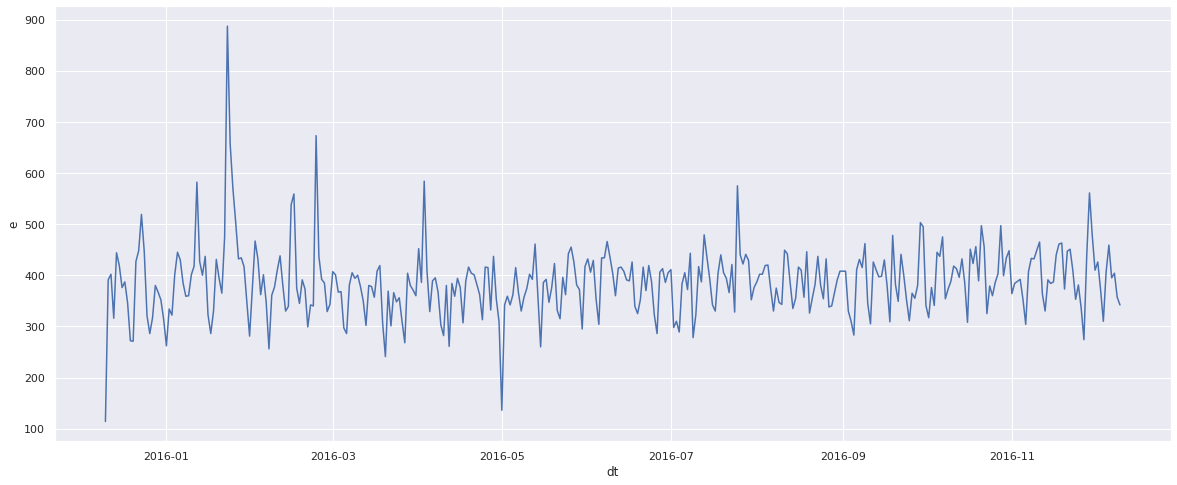

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))
sns.lineplot(x = df_aggregation.index, y= 'e', data=df_aggregation)

Let's get rid of emissions:

<AxesSubplot:xlabel='dt', ylabel='e'>

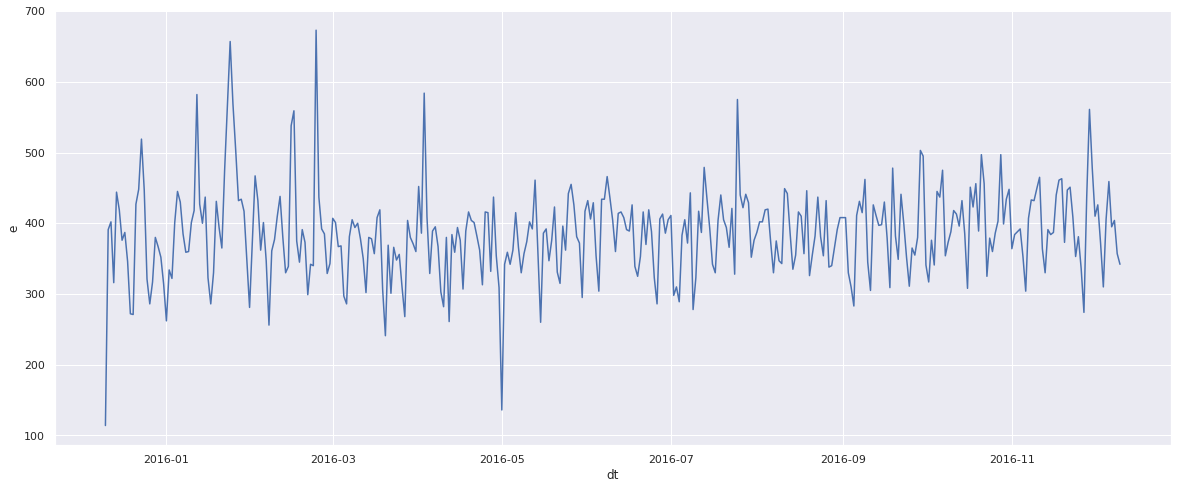

In [35]:
df_aggregation = df_aggregation[df_aggregation['e'] < 700]
plt.figure(figsize=(20,8))
sns.lineplot(x = df_aggregation.index, y= 'e', data=df_aggregation)

In [36]:
!pip install fullmoon

In [37]:
from fullmoon import NextFullMoon, IsFullMoon

Let's create a list of all the full moons for 2016:

In [38]:
n = NextFullMoon()
n.set_origin_date_string('2015-11-11')
full_moons = []
while True:
    next_full_moon = n.next_full_moon()
    if next_full_moon >= datetime.datetime(2016, 12, 10):
        break
    full_moons.append(next_full_moon.date())

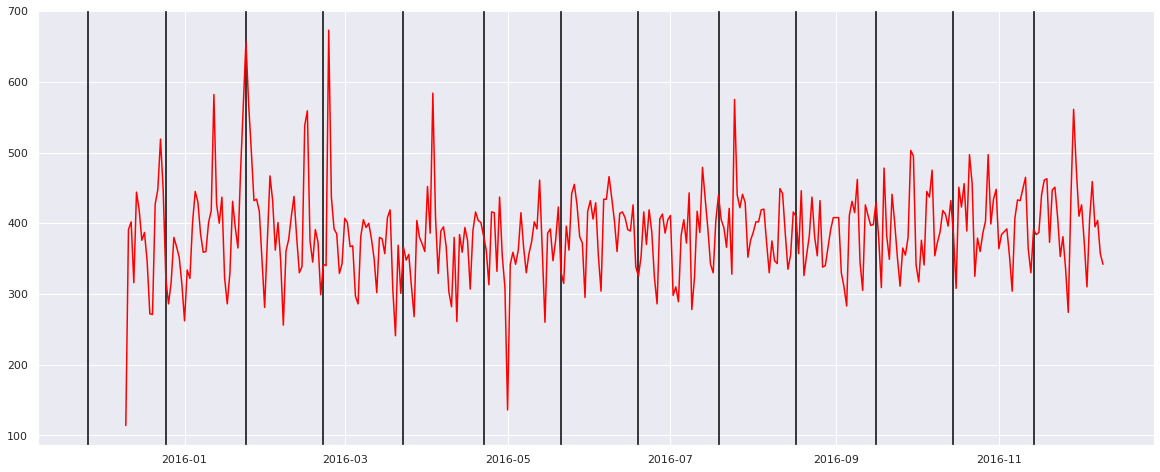

In [39]:
fig, ax1 = plt.subplots(figsize=(20,8))

for fm in full_moons:
    ax1.axvline(x=fm, color='black')
ax1.plot(df_aggregation['lat'], color='red')

So far, an intermediate conclusion can be made that the correlation **is not traced**

In [40]:
df_aggregation2 = df.groupby('dt').count()

In [41]:
df_aggregation2.reset_index(inplace=True)

In [42]:
df_aggregation2['is_full_moon'] = df_aggregation2['dt'].apply(lambda x: x in full_moons)

In [43]:
df_aggregation2[df_aggregation2['is_full_moon'] == True]['e'].mean()

398.3333333333333

In [44]:
df_aggregation2[df_aggregation2['is_full_moon'] == False]['e'].mean()

386.5211267605634

For hypothesis testing, we use Student's t-test. We have 2 hypotheses:
1) H0: Average 911 calls on full moon and normal days are the same

2) H1: Average 911 calls on full moon and normal days are different

In [45]:
from scipy import stats as st
alpha = 0.05

In [46]:
df_true = df_aggregation2[df_aggregation2['is_full_moon'] == True]['e']
df_false = df_aggregation2[df_aggregation2['is_full_moon'] == False]['e']

In [48]:
results = st.ttest_ind(df_true, df_false)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the 0-hypothesis")
else:
    print("Failed to reject the 0-hypothesis")

p-value: 0.5545389023995375
Failed to reject the 0-hypothesis


### What global conclusions can we draw?

According to the small research done, it became clear that there is no special correlation and this difference is covered by an error.


Our theory is proven not only by visual analysis, but also by checking the Student's t-test